In [279]:
import cv2

In [280]:
import numpy as np

In [281]:
import matplotlib.pyplot as plt

In [282]:
import random

In [283]:
YELLOW_EMOJIS = '😹😸😺🤕🤒😷🤧🥴🤐😬🤥🤫🤭🤔🙄😴😪😓😭🤤😥😢😳😵🥱😲😮😧😦😯😑😐😶😤🥺😩😫😖😣😕😟😔😞😒😏🤠🥳🤩😎🤓🧐🤨🤪🤗🤑😛😝😜😋😚😙😗'
BLUE_EMOJIS = '💎💙🌊🌌🧊💧🐬🔵🟦🫐💦🐳🌀🧿🔹🥶🐋⛲🌃🌐📘🐟🌠🔷🧢👥👤🆒🆓👖'
WHITE_EMOJIS = '👟🐭🐮🕊🐚🧂🔭🤍🐑🦢🧴'
BROWN_EMOJIS = '🐻👁💼👜🤎🟫🟤💩🐗🧳🦉🐌🦔🦦🦫🦥🪵'

In [284]:
COLOR_EMOJIS = [
    YELLOW_EMOJIS,
    BLUE_EMOJIS,
    WHITE_EMOJIS,
    BROWN_EMOJIS
]

In [285]:
for color_row in COLOR_EMOJIS:
    for i,emoji in enumerate(color_row):
        print(i,emoji)

0 😹
1 😸
2 😺
3 🤕
4 🤒
5 😷
6 🤧
7 🥴
8 🤐
9 😬
10 🤥
11 🤫
12 🤭
13 🤔
14 🙄
15 😴
16 😪
17 😓
18 😭
19 🤤
20 😥
21 😢
22 😳
23 😵
24 🥱
25 😲
26 😮
27 😧
28 😦
29 😯
30 😑
31 😐
32 😶
33 😤
34 🥺
35 😩
36 😫
37 😖
38 😣
39 😕
40 😟
41 😔
42 😞
43 😒
44 😏
45 🤠
46 🥳
47 🤩
48 😎
49 🤓
50 🧐
51 🤨
52 🤪
53 🤗
54 🤑
55 😛
56 😝
57 😜
58 😋
59 😚
60 😙
61 😗
0 💎
1 💙
2 🌊
3 🌌
4 🧊
5 💧
6 🐬
7 🔵
8 🟦
9 🫐
10 💦
11 🐳
12 🌀
13 🧿
14 🔹
15 🥶
16 🐋
17 ⛲
18 🌃
19 🌐
20 📘
21 🐟
22 🌠
23 🔷
24 🧢
25 👥
26 👤
27 🆒
28 🆓
29 👖
0 👟
1 🐭
2 🐮
3 🕊
4 🐚
5 🧂
6 🔭
7 🤍
8 🐑
9 🦢
10 🧴
0 🐻
1 👁
2 💼
3 👜
4 🤎
5 🟫
6 🟤
7 💩
8 🐗
9 🧳
10 🦉
11 🐌
12 🦔
13 🦦
14 🦫
15 🦥
16 🪵


In [286]:
print(random.choice(YELLOW_EMOJIS))

😔


In [287]:
img = cv2.imread('./images/jan01/1280px-Twemoji2_1f602.svg.png', cv2.IMREAD_UNCHANGED)

In [288]:
trans_mask = img[:,:,3] == 0
img[trans_mask] = [255, 255, 255, 255]
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

In [289]:
img = cv2.resize(img,(100,100))

In [290]:
#img = img/255.0

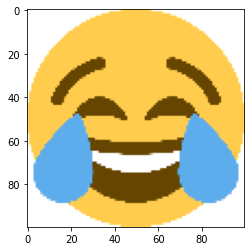

In [291]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [292]:
# Yellow: #ffcc4d [255, 204, 77]
# Blue: #5dadec [93, 173, 236]
# White: #ffffff [255, 255, 255]
# Brown: #664500 [102, 69, 0]
colors = [
    np.array([77, 204, 255]),
    np.array([236, 173, 93]),
    np.array([255, 255, 255]),
    np.array([0, 69, 102])
]

In [293]:
def get_closest_color(x):
    dist_list = []
    for color in colors:
        dist = np.linalg.norm(x-color)
        dist_list.append(dist)
    return np.argmin(dist_list)

In [294]:
for y, row in enumerate(img):
    line = ''
    for x, pixel in enumerate(row):
        closest = get_closest_color(img[y][x])
        line = line + random.choice(COLOR_EMOJIS[closest])
    print(line)

🐚🤍🐑🕊🤍🧂🐭🤍🧴🐭👟🕊🐮🦢🧴🔭🦢🐭🧂🦢🕊🧂👟🔭🦢🐮🕊🐚🧂🦢🐚🧂🐑🕊👟🦢🧂🕊🔭🧂🐮🐭🔭😳😝🧐😺😪😓🥴😪🤓😺😣😺😧🤑🤍👟🧴🐑🕊🤍🕊🐭👟🐑🐚🔭🦢🐑🐮🕊🐮🦢🤍🔭🐮🐑🦢🐑🤍🦢🐚🤍👟🔭🐮🔭🐚🐚🦢👟🐚🔭🦢🐚🐭🐮🕊
👟🐚🧴🔭👟🐭🐚🧂👟👟👟🐚🐮🐑🧴🐑🐭🧴🐮🔭🧴🐑🧂🔭🧴🕊🤍🤍🐭🦢👟🐮🐮🐚🐚🐭🐭🐑😵🥱😐😥😜🥺🥴🧐🥱😞😴😤🤑🤩🤔😳😙🥱😸😬😬😓😏😩🔭🐚🔭👟🤍🦢🐑🐑🕊🕊🐮🐚🤍🔭🔭🧴🐭🤍🕊🦢🤍🧴🐭🔭🐑👟🐚🕊🐑🔭🐑🤍🧴🐑👟🐚🐮🧴
🦢🐚🧴👟🧴🐭🤍🐚🦢🧴🐚🔭👟👟🧴🧂🔭🕊👟🐮🤍👟🤍🐚👟🧴🐭🧂🤍🕊🧂👟🔭🐮🤑🧐🥺🤩🤩😫🤓😏😢🤨😪😔😙😣😯😐😜😯😓😜🤭😷🥺😦😹😟🤨😷🧐😹😵😤🐮🔭🔭🧴🕊🔭🐚🔭🧴🐮🦢👟🐑🕊🧴🧴🐚🐚🕊🧂🐭🦢🕊🤍🐭🐭🕊🔭🧴🤍🐚🐭🦢🕊
🦢🔭🐭👟🐚🦢🐑🐑🦢🤍🐚🐭🦢👟🧂🧴🐮🐑🐑🐚🐮🐭🕊🦢🐮🧴🧂🧂🔭👟🐭😐🙄😴😐😸😬😞🤥😧😩🤫🤐😷😭🤓😬😓🤩😤😑😖😹😑🥺😲🤓🤕😗🤭😺🤗🥴😮😳😬😖🙄😬🔭🧂🧂🔭🐭🐭🐑🦢🧂🧴🤍🐚🐚🐭🐭🤍🐮👟🤍🐑🤍🕊🤍👟🔭👟🧂🧂🔭🔭🕊
🧂🦢🕊🐭🤍🦢🤍🐭🐑🐚👟👟👟🐭🐮🐑🐭🦢🤍🕊🐮🤍🧂🧴🐑🕊🤍👟🧂😕😸🤠😝😹😚🤠😯😢😦🥳🤔😪🤒😳😮🤥😢😲🤠😢😛😙🤪😲🤫😒🤒😤😪🧐🤩🤤😺😝🙄😚😵😣😹🤨😐🔭🐚🤍🧂👟🕊🔭🤍🐑🤍🔭🕊🐮🔭🔭🐭🐭🦢🕊🐭🕊🧂🐮👟🐑🧂🤍🕊🔭
🧴🔭🤍🕊🤍🧂🕊🧂🧴🐮👟🧂🔭👟🤍🧴🧴🦢🦢👟🕊🐭🐑🧂🧂🐚🕊😴😋😸🥳😚🤔😭🤤😣😯😩😫🥺😚🥴🤑🤫😜🤠😔😙🤗😩😏😏😷🤗😋🤧😤😯😐😐😲😧😫😞🤫😞🤔😵🤧😵🤭😲🥳🤍🐚🐭🐑🐚🐑🕊🐑🦢🔭🐮🐭🕊🕊🔭🧂🐮🐚🧴🧂🦢🕊🤍🧂🦢👟🐚
🐭🐑🐭🐭🤍🐭🧴🤍🐭🧂🧴🐭🦢👟🐭🧴🐭🐭🧂🐑🧴🐭🦢🧂👟🤓😐😗😭😸😏🤤🤔🤓😛🤩🙄🤥😚😫🥴😞😩😔😵🙄🤓😒🤗🤧😹😦😬🤥😑🤓🤥🤥😜🤕😣😹🤑😵😞😳😸😭🤔😟😓😳😩😲😞🐚🕊🐭🐮🔭🐮🦢👟🕊🐮🤍🐭🤍🕊🐑🤍🐭🐮🔭🧂🦢🐭🕊🦢🤍
🐚🔭🐚🦢🕊🧴🔭🤍🕊🔭👟👟🐮🐚🦢🤍👟🧂🤍👟👟🐚🔭🐚😤🧐😓😐🤓😒😦🤔🤕😓😭😚🤠😚😖😦🥴😖😦😓😜🤗😢🥳🥳😣😒😙😐😬😖🥺😎😬😞😗😩🤧😵🤐😓😢😝😑😲🤕😦🤩😕😙🥳🤫🐚🐑🤍🤍🐑🧴🤍🐑🐮🐭👟🐮🐭🕊🔭🦢👟🧂🐮🐑🐑🔭🕊🐑
🤍🐑🐚🐭🐑🤍🧴🐑🧴🐚🦢🐭🧴🧴👟🦢🧂👟🕊🔭🦢🐭😐😪😭🤩😵😵😓😤🤓🤓😙🤫🤭🤪🥺🤑😔🥴😗🤗🤑😎😤😹🤐🤧😐😕😓😯😫🤐😓😑😗🤒😋😫🥳😫😴🤭😟😋🤒😑😜🤪😕🥱🤥😑😙😔🤭😋🐮🐭🐭🧂👟🐭🐮🐭🐭🐚🐮👟🧂🐚🤍🐚🤍🧴🐚👟🕊🕊
🧴🐑👟🕊🐮🐭🐚🐭🔭👟🐑🕊🐮🤍🧴🔭🧂🧂🦢🔭🐚🤑😋😴😕😹🤗🥱😒😞😙🥴😞😹😴😦😶😷😴🤥🤩😸😥😷😎😜🤤🤔🥴😷😞🥺😢😺😯😧😩😓😋😏🥳😶🤕😟😣🤪😒😦🤕😟😒😚🥺😶🤒😳😙😑😧🐭👟🐭🐮🦢🦢🐮🦢🐮🕊🦢🧂

🔭🔭🐑😣🫐🌊🐬⛲🧿👥👥👤👥🐳🫐🧊👤🌐💦💙👤🌃🐋👤🐳🐳👤💙🫐🧢🧂🤍🦢👟🔭🕊🧴🦢🔭🦢🦢🤍🤍🤍🐮🐭🔭🧂🐭🐑👟👟🦢🔭🧴🕊🔭🐮🦢🐮🐮🐑🕊🧴🐭🧂🧴🧂🐭🔭🥶💧🔹⛲🧢🧢👖🐳👖🐟⛲🐋💦🧊💎🌠🌊🔹🔹🆒🧊🌐👤👤🔷😛😴🔭🐚🐚
🔭👟🐚🐚📘🔷🔵👖🌠💎🐳🐬🔹🟦🌠🌃🌊🌃⛲🫐🌐📘🔹💎💎🧢📘💎🐳💦🧂👟🐮🧂🕊🐭🧂🕊🐚🔭🦢🕊🐚🧴🔭🔭🧂🐚🕊👟🐭🐮🧂🧂🐚🐮🐚🕊🔭🐑🐭🐚🦢🕊🤍🐑🔭🕊🦢🦢🟦📘🔵🐟🌀🟦🧿💦🟦💧🔵🌠🌀💎🆓👥🐳💧🧢🐋🔹🌐🧊🥶🌐🆓🐚👟🧂🐮
🧴🐚👟🤍🐋🧢👤👥🧊🌌💙⛲💦👖👖🆓🐋💎📘🧿💙💦🥶🐳🔷🧢🌊🧢👤🐬🤎🐻🕊🔭🦢🧴🔭🧂🦢🐮🤍🐚🦢🐮🐚🐭🔭🦢🐭🧂🐮👟🐚🤍🐭🧂🕊🧴🧂🤍🔭🐭🤍🐮🧂🕊🕊🦢💩🧳👤🐟🌠🌌🔹🐬💦🐟🔷🐬🆓👤⛲🧊🆒📘📘🌊💎👖📘💙💙👖🔷🫐🧂🔭🤍🕊
🧂🧂🐮💧🌐🟦🟦🌌🐬💙🧿🌐💦🌌🌐💙🆒🌀⛲👤🌊🌌🔹🟦🔵📘🐟👤💙📘👜👜🦥🐻👟🔭🕊🐑👟🤍🐑🦢🐭🧂🔭🔭🔭🐚🐚👟👟🧴🔭🕊🐚🤍🧂🔭🤍🦢👟🕊🐭🐑🕊🐮🟤🦉🦔🐻🆓🫐🟦🥶🌐🔵🌃💎🌊🥶💧🌀🌊🔹🌊🐬🥶🌀🌠📘🫐👥🧢🫐👥🆒👥🐮🐮🐚
🐭🐑🧴💦🐋🌠🫐🔹🐬👥🌃⛲📘🧿🆒🌌🌐💎🆒👤🧿🌌🆓🐋📘🔷👤🆒🐋🐋🦉🤎🦥👜🟫🟤🦢🐑🐚👟👟🐑🐮🧴🐮🐚🐭🦢🐭🦢🐑🧂👟👟🐑🤍🕊🐮🐮👟🐑🐚🐮🧴🧳🐻🦉🦉👜🤎🌊🥶🆒⛲🔷👥⛲🧊👥🔷💧👤🧊💦🔷👤🆒🌌🐟🌀🐟💧🥶💎🔹💙🧊👟🤍🤍
👟🕊👟🌀🔵🐳👤🥶🥶🌃💎🧊🔵🔵🟦🧢🔹🥶🌀🌀🌃🌊👥👖🟦🫐💎🌐🔵💎🐻🟫🪵🧳💼🤎🤎💩👁🐑👟🤍🧂🐭🐭🕊🧴🔭🐭👟🐚🕊🐚🐚🐚🐑🦢🐭🤍🦢🦢💩🐗🧳🟫🤎🦥🦫👁🌠🫐👤💦🐬👤🐋🌐🧿🔹💎🔵🔹🐬🧊🐋🧊💧🐋💙👤🧊🫐🫐🧢🥶🫐🐋🕊👟🧂
🔭🧂🧴🔹💧🌠👥💦🥶🫐💧🟦🌃🌀🌃👤👤🌃🌐🌐🧿🌌🔷🐳🧿🌠🌊🆒👤👤🦔🦥💼💩🪵🟫🟤🦔🟤🦥🦥🪵🤎🧂🦢🐚👟🧂🐚🐮🧂🐑🐚👟🧴🦢🐑🟤🟤🦉🦔🦉🐌🦔👁🧳🦔🪵🐌🐬👤👤💙🔵🌀🐋💎👖💎🌃🌊⛲🌀👤🌊🆓💧🌐🧢🫐🆒💦🌠👤🔹🥶🐬🧴🔭🧴
🕊🐑🦢⛲🐬👖🧊💦🌊🌠💧💦🔷🆒💦🆒🫐🌃🔵💧🌠🔹👤🐟🫐🔹👤🌌🐋🧢🤎🐗🟫🐗🦔🐗🟫🦔🐌💩🟤🐗🦉👜🤎👜🪵🟫💩🟤🐻🧳💼🦉🤎👜🦥🤎🟤🦥🟤🧳🟫🦦🟫🦫🐗🪵💼🆒🧿🌌🆓🔷🌐🔷🔹🧢👤🌀👥👤🐳🌀🌌🌠📘🔷📘🐬💎🔹🔵🧊🧢🆓🐟🐚🕊🐭
🔭🐭🕊💧🟦🐋🌀🐟🌃🌌🌊👖🫐🐋🆒🌌🥶📘💙🐬🌌🌀💙💧🌀🌃📘👖👥👖🐻🪵🟤🟫🦫🦦🐻💩💼👜🪵🤎🦦🪵🐗💩💼🟫🦔🦫🟫🟤🐌👜🐻👁🦦🦔🐗🦔🐌🐗🦉🪵🦔🦉🧳🦔🐻💼🔷🆓🧊🌀🌌⛲💧📘🌀🔹🐳🆓🌠👖💦🧢💙🔹🔵⛲🌌📘🌐🟦💦🐋🐳🧂🤍🦢
🐚🧂🐮🌠🧢🌀🆓🐋🆒💦🆓📘🐟⛲💙📘🌀🐋👖🫐🆓🧢📘💦🌐🟦🐟💦🧿📘🦥🦫💩🦉🟤🪵🦔🦦🟫🤎👁🤎🦔🧳🦦🤎🟫👁👜🦫🦥👁🦫🪵🦔🧳🦫🟤💼👜🪵💼🤎👜💩🐻💼🟫👜👜🔷🧿👤🧿🌊🫐🐳🌊🌠🐋🧿🧊🌃🔹🐋🥶👖🧊🧊👥🧿

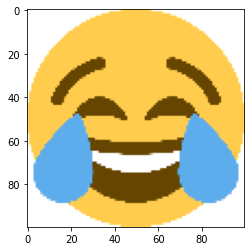

In [295]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))